In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process import kernels,GaussianProcessRegressor
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.gaussian_process import kernels,GaussianProcessClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

In [8]:
file_path = 'student_peformance_data.csv'
df=pd.read_csv(file_path)
df.head().T   #I have transposed the data vertically

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Exploratory Data Analysis

In [15]:
# Check value counts of every feature
for column_name in df.columns:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:")
    print(value_counts)
    print('---------------------------------')

Value counts for school:
school
GP    349
MS     46
Name: count, dtype: int64
---------------------------------
Value counts for sex:
sex
F    208
M    187
Name: count, dtype: int64
---------------------------------
Value counts for age:
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
---------------------------------
Value counts for address:
address
U    307
R     88
Name: count, dtype: int64
---------------------------------
Value counts for famsize:
famsize
GT3    281
LE3    114
Name: count, dtype: int64
---------------------------------
Value counts for Pstatus:
Pstatus
T    354
A     41
Name: count, dtype: int64
---------------------------------
Value counts for Medu:
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
---------------------------------
Value counts for Fedu:
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
---------------------------------
Value counts

In [16]:
# Initialize lists for numerical and categorical features
numerical_features = []
categorical_features = []

# Differentiate numerical and categorical features
for column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
        numerical_features.append(column_name)
    else:
        categorical_features.append(column_name)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


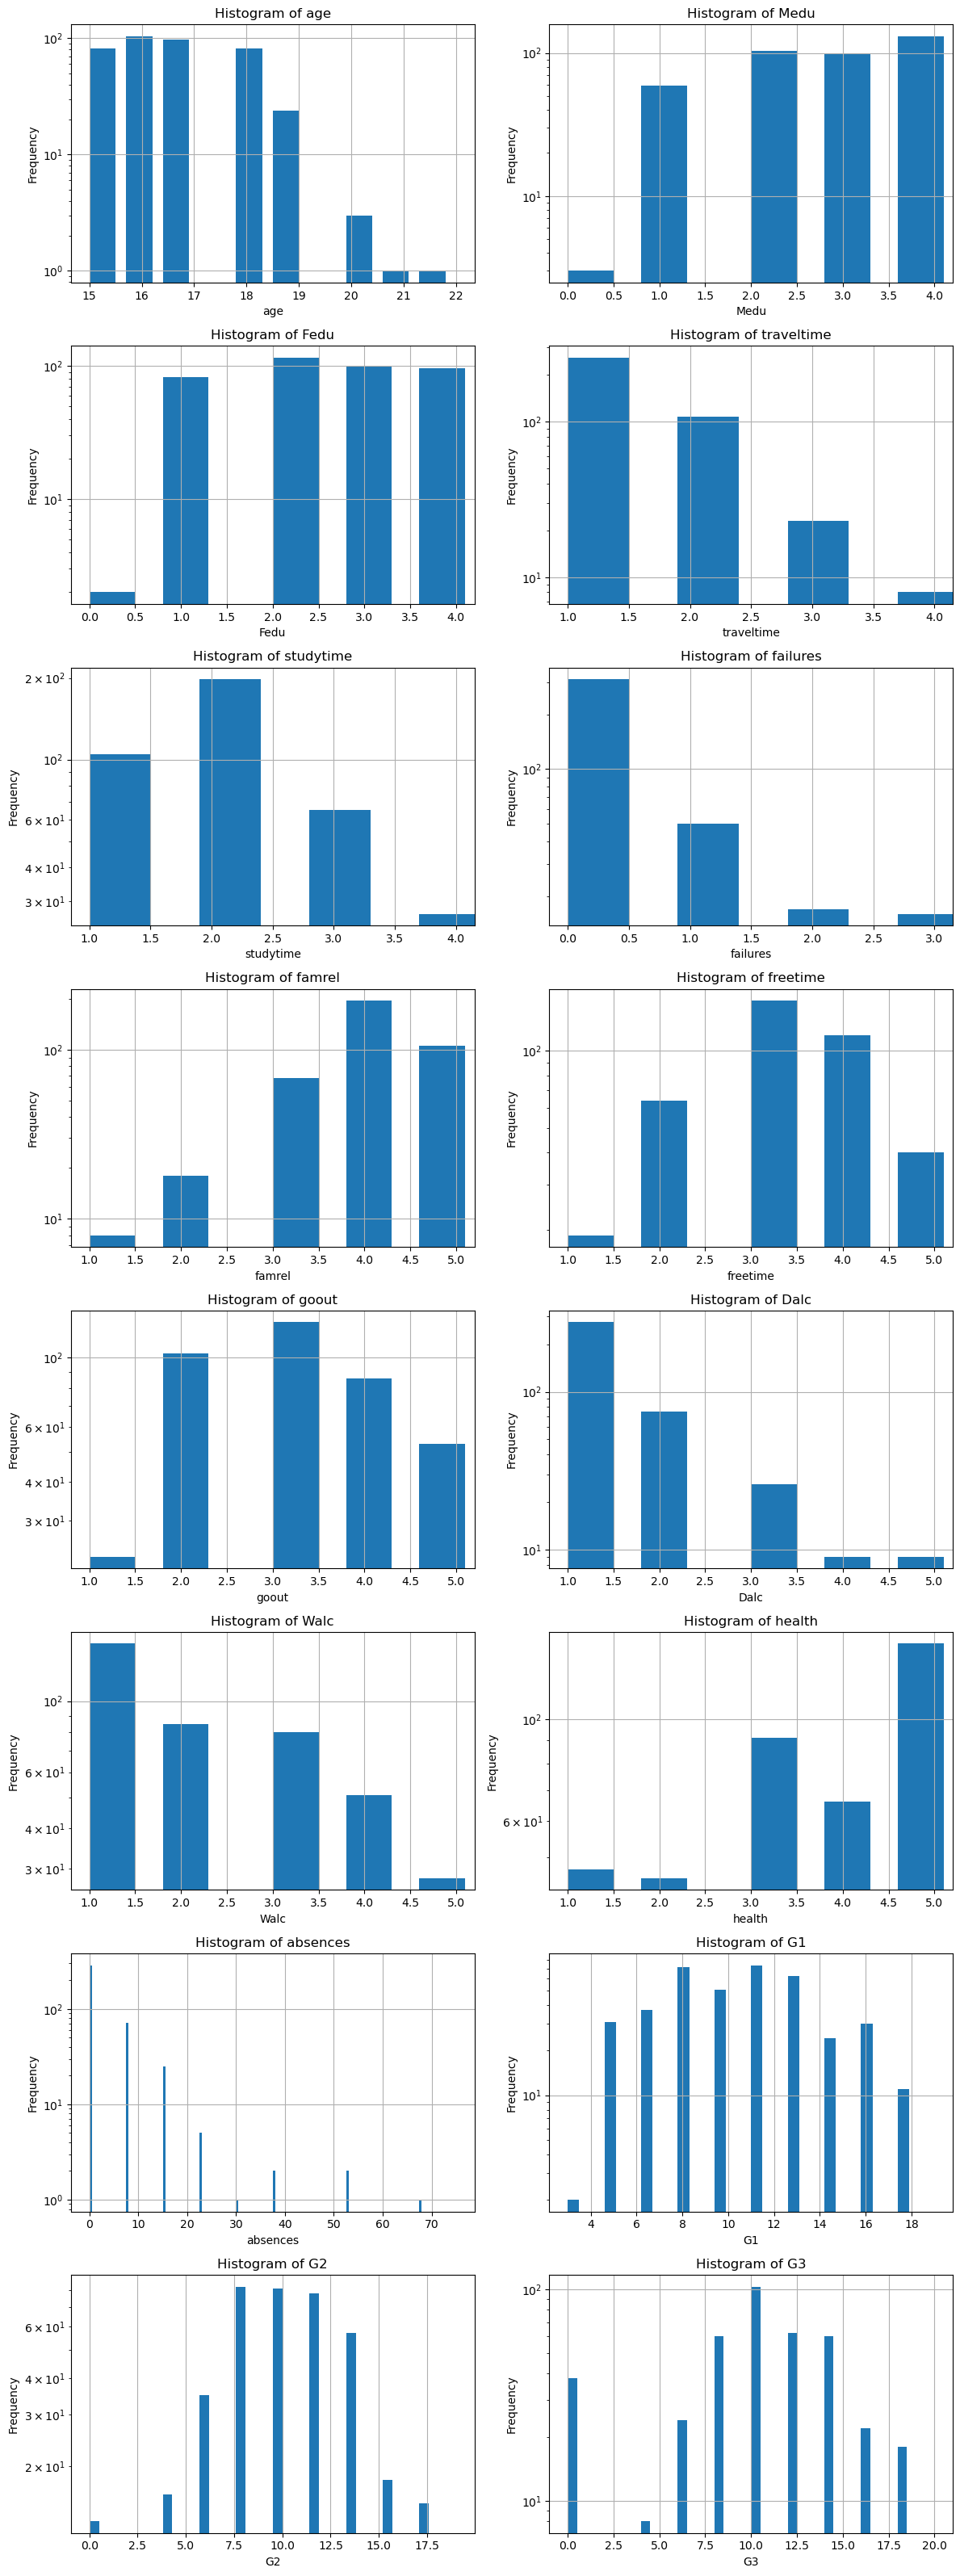

In [17]:
# Visualization of numerical features
num_of_rows = math.ceil(len(numerical_features) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(numerical_features):
    ax = axarr[i // 2, i % 2]  # Represents one subplot in the grid
    df[col].plot.hist(ax=ax, bins=10, logy=True, xlabel=col, grid=True, width=0.5)
    ax.set_title(f'Histogram of {col}')
fig.tight_layout()
plt.show()

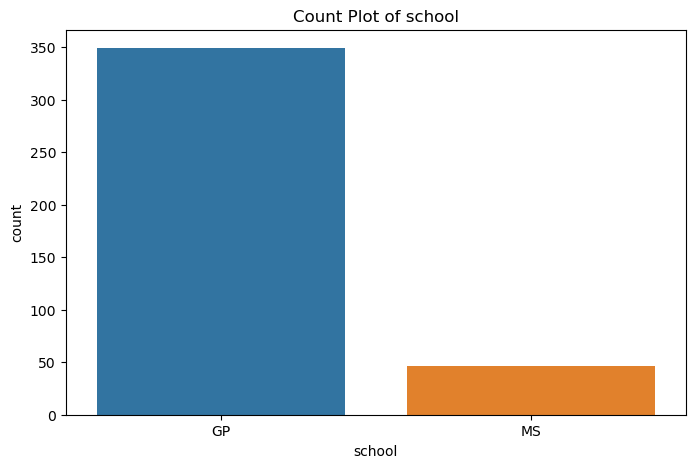

school
school
GP    349
MS     46
Name: count, dtype: int64


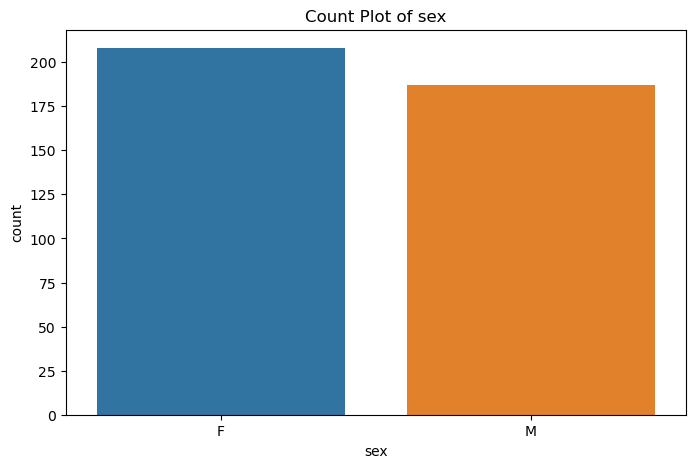

sex
sex
F    208
M    187
Name: count, dtype: int64


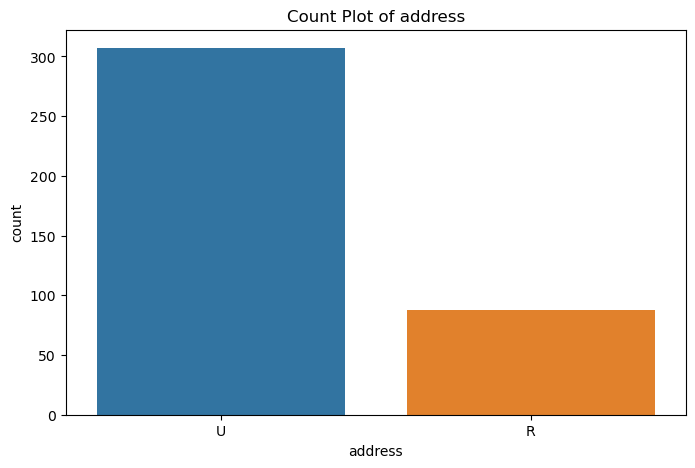

address
address
U    307
R     88
Name: count, dtype: int64


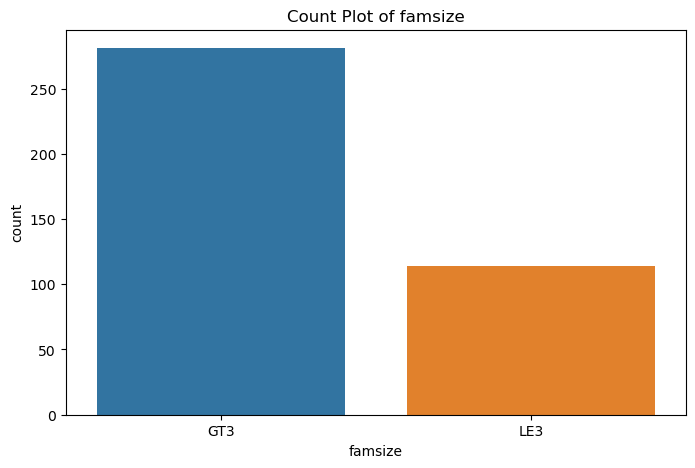

famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64


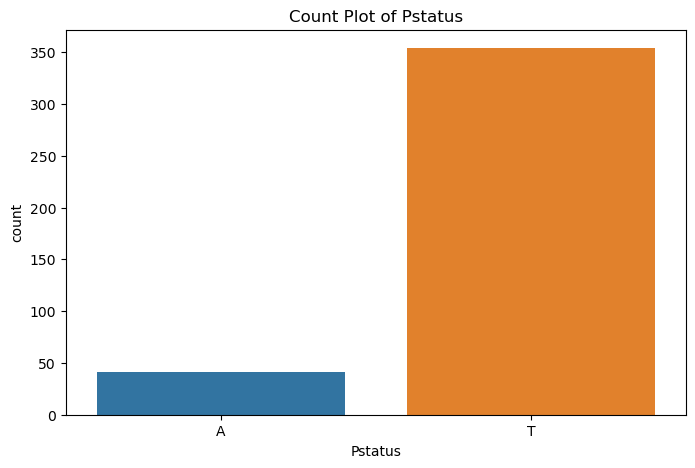

Pstatus
Pstatus
T    354
A     41
Name: count, dtype: int64


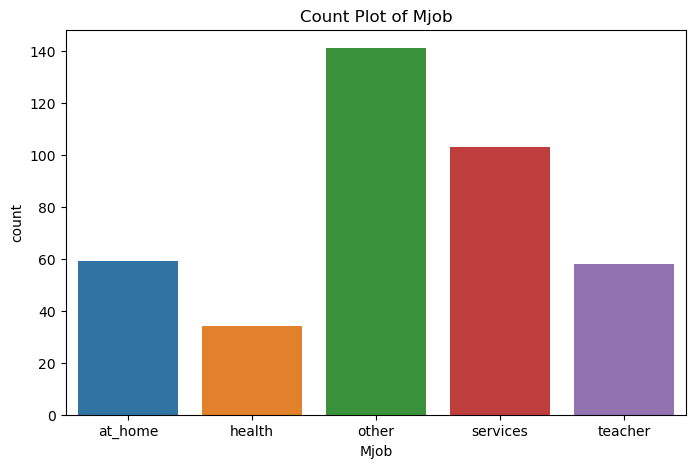

Mjob
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


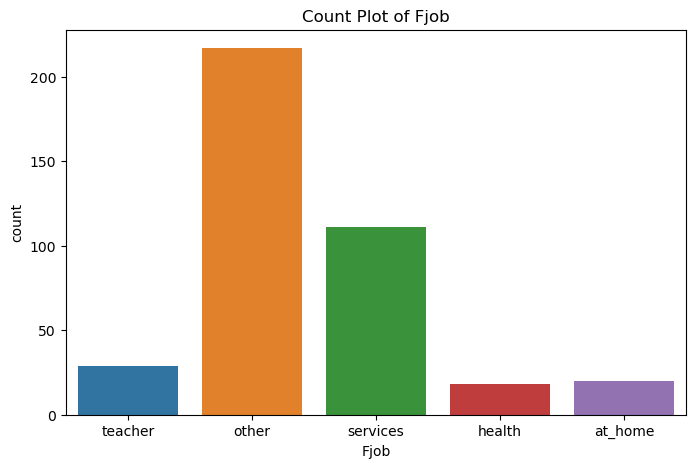

Fjob
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


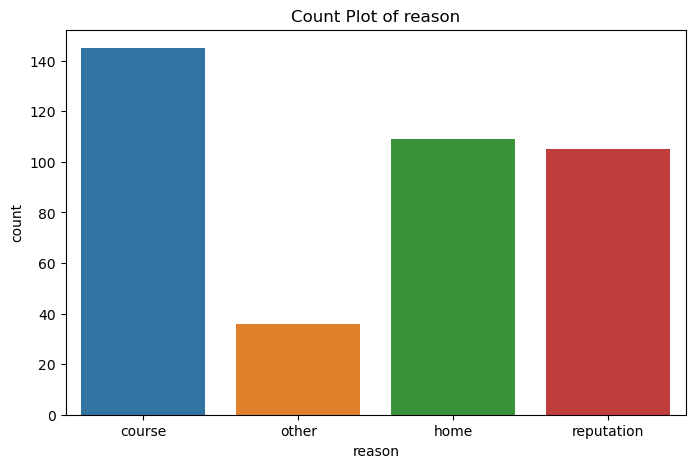

reason
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64


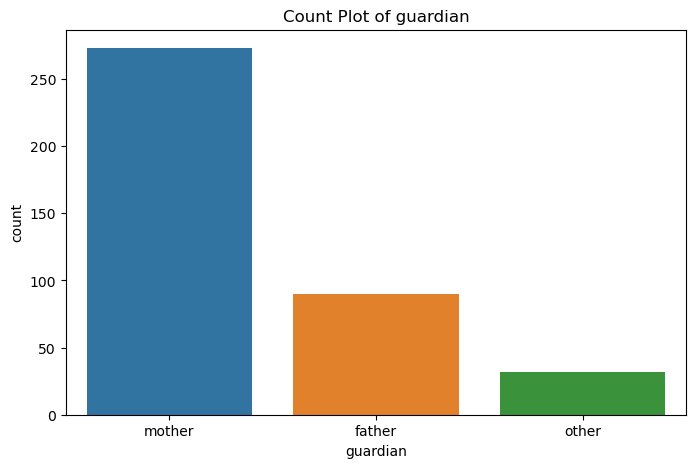

guardian
guardian
mother    273
father     90
other      32
Name: count, dtype: int64


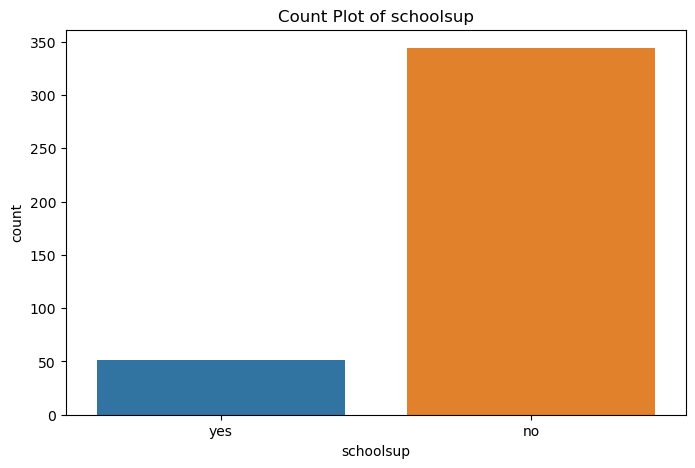

schoolsup
schoolsup
no     344
yes     51
Name: count, dtype: int64


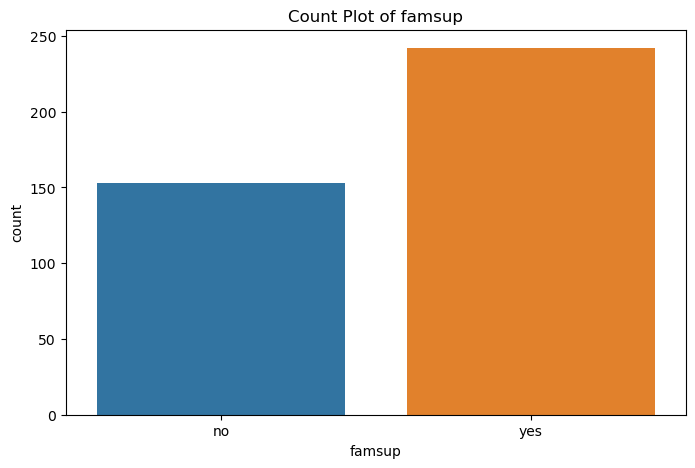

famsup
famsup
yes    242
no     153
Name: count, dtype: int64


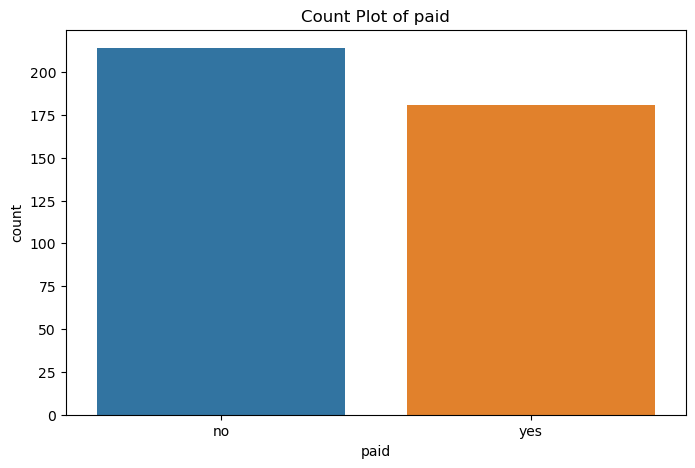

paid
paid
no     214
yes    181
Name: count, dtype: int64


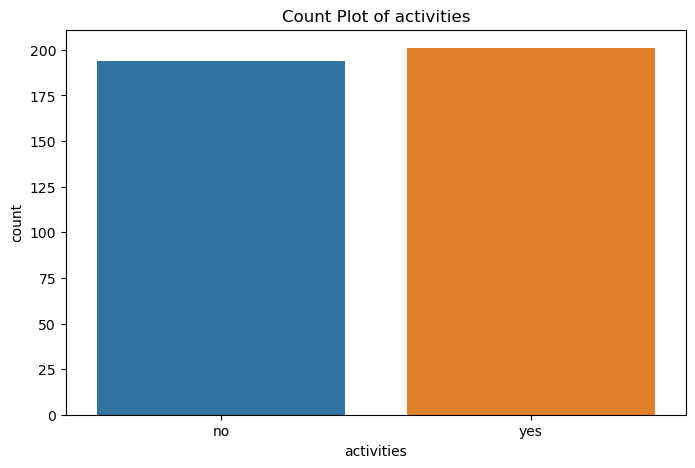

activities
activities
yes    201
no     194
Name: count, dtype: int64


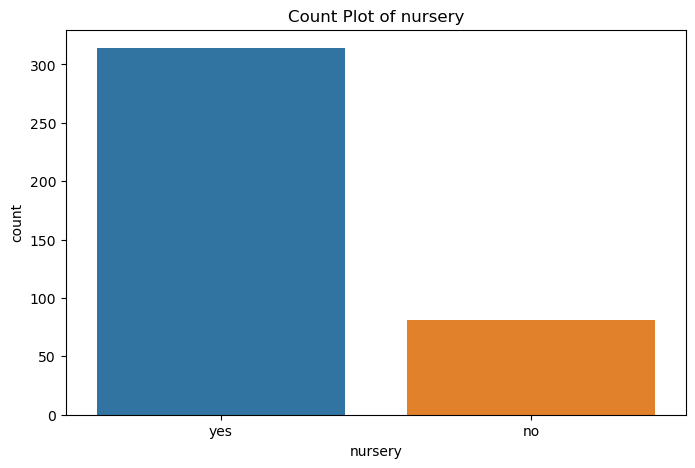

nursery
nursery
yes    314
no      81
Name: count, dtype: int64


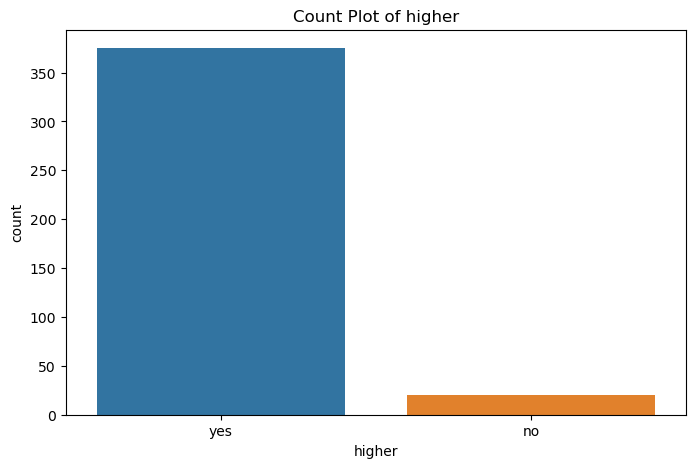

higher
higher
yes    375
no      20
Name: count, dtype: int64


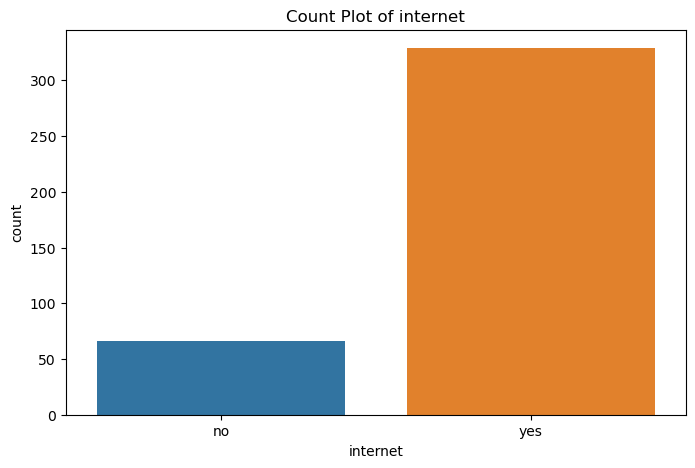

internet
internet
yes    329
no      66
Name: count, dtype: int64


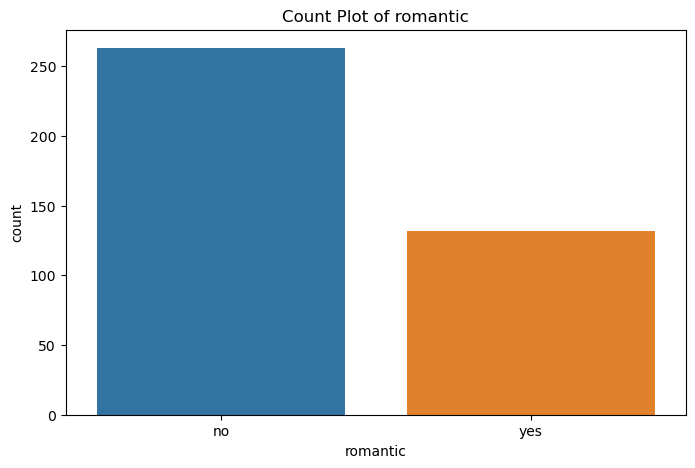

romantic
romantic
no     263
yes    132
Name: count, dtype: int64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def hist_plot(col_name):
    plt.figure(figsize=(8, 5))
    
    if pd.api.types.is_numeric_dtype(df[col_name]):
        sns.kdeplot(data=df, x=col_name)
        plt.title(f'KDE Plot of {col_name}')
    else:
        sns.countplot(data=df, x=col_name)
        plt.title(f'Count Plot of {col_name}')
    
    plt.show()
    print(f"{col_name}\n{df[col_name].value_counts()}")

# Assuming df and categorical_features are already defined
for col in categorical_features:
    hist_plot(col)


C:\Users\pujan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pujan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pujan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pujan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

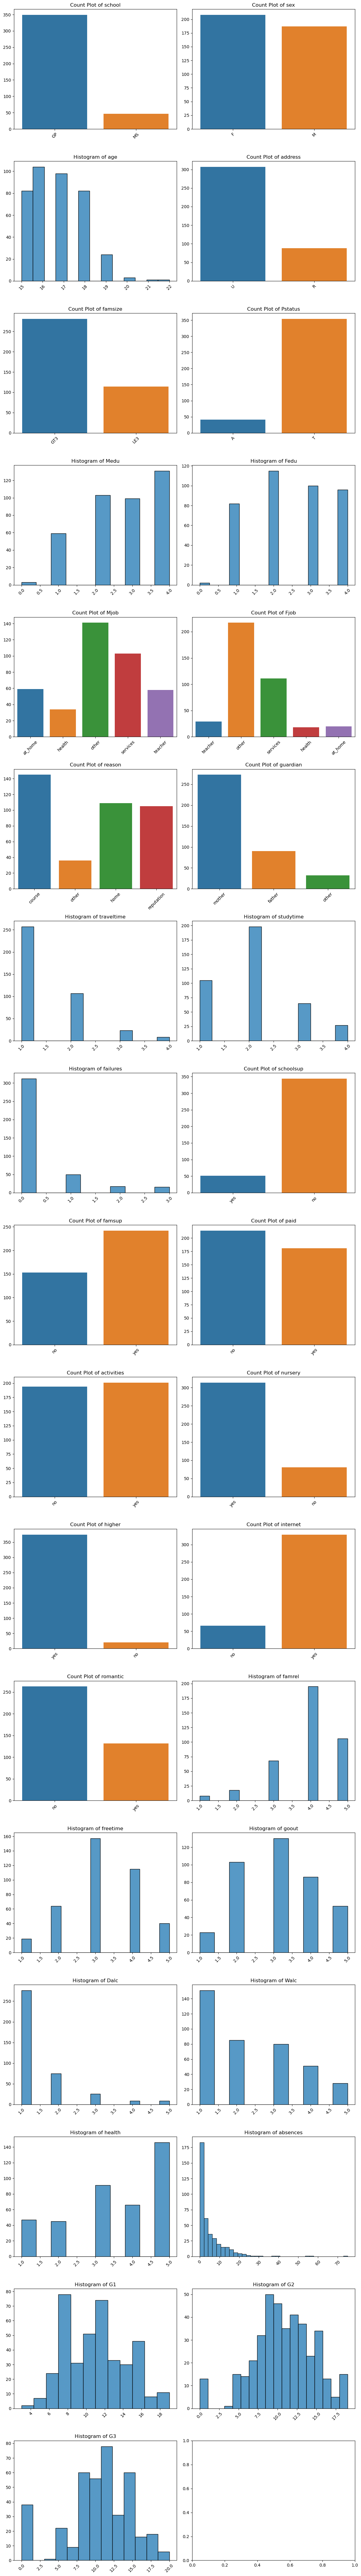

In [24]:
def hist_plot(col_name, ax):
    if pd.api.types.is_numeric_dtype(df[col_name]):
        sns.histplot(data=df, x=col_name, ax=ax)  # Use histplot for numerical variables
        ax.set_title(f'Histogram of {col_name}')
    else:
        sns.countplot(data=df, x=col_name, ax=ax)  # Use countplot for categorical variables
        ax.set_title(f'Count Plot of {col_name}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelrotation=45)

# List of all columns in the DataFrame
all_columns = df.columns.tolist()

# Create subplots with 1 row and 2 columns
num_plots = len(all_columns)
num_rows = (num_plots + 1) // 2  # Ensure we have enough rows for all plots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5*num_rows))

# Call hist_plot function for each column and plot in subplots
for i, col in enumerate(all_columns):
    row = i // 2
    col = i % 2
    hist_plot(all_columns[i], axes[row, col])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [25]:
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
#list of columns that are numerical
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
categorical_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [27]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((316, 58), (316,), (79, 58), (79,))

In [59]:
X_test

array([[18, 2, 1, ..., True, True, False],
       [18, 4, 3, ..., True, False, True],
       [17, 3, 4, ..., True, True, False],
       ...,
       [21, 1, 1, ..., False, True, False],
       [18, 3, 2, ..., True, True, False],
       [19, 1, 1, ..., True, True, False]], dtype=object)

In [60]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 1.31309272, -0.73641878, -1.4164582 , ...,  0.42839304,
         0.67544148, -0.67544148],
       [ 1.31309272,  1.1178309 ,  0.42552037, ...,  0.42839304,
        -1.48051315,  1.48051315],
       [ 0.48652439,  0.19070606,  1.34650965, ...,  0.42839304,
         0.67544148, -0.67544148],
       ...,
       [ 3.79279769, -1.66354363, -1.4164582 , ..., -2.33430495,
         0.67544148, -0.67544148],
       [ 1.31309272,  0.19070606, -0.49546892, ...,  0.42839304,
         0.67544148, -0.67544148],
       [ 2.13966104, -1.66354363, -1.4164582 , ...,  0.42839304,
         0.67544148, -0.67544148]])

#### Create a Linear Regression Model

In [61]:
# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [62]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [63]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 32751891296957.773
MSE: 1.8422222673627638e+27
RMSE: 42921116800041.02
R2 Square -7.955624330956011e+25
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0545065076660607
MSE: 2.4907803196866176
RMSE: 1.5782206181920884
R2 Square 0.8770431958555724
__________________________________


In [34]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.650887,5.643593,2.375625,0.724771,0.781475


In [35]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the Gaussian Process Regression model with an RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_regression = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)

# Fit the Gaussian Process Regression model
gp_regression.fit(X_train, y_train)

# Predict on the test set
gp_regression_test_pred = gp_regression.predict(X_test)

# Evaluate the Gaussian Process Regression model
print('Gaussian Process Regression Test set evaluation:\n_____________________________________')
print_evaluate(y_test, gp_regression_test_pred)


Gaussian Process Regression Test set evaluation:
_____________________________________
MAE: 1.9999667934813898
MSE: 7.474180391889892
RMSE: 2.7338947294820795
R2 Square 0.6354955785188572
__________________________________


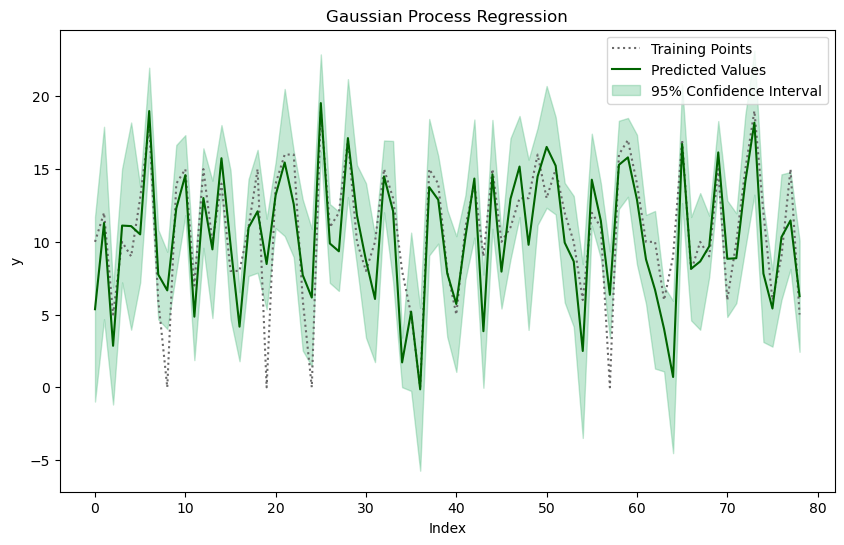

In [50]:
import matplotlib.pyplot as plt

# Plot the original data points
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='dimgray', label='Training Points', linestyle="dotted")

# Plot the predicted values and uncertainty
plt.plot(range(len(y_pred)), y_pred, color='darkgreen', label='Predicted Values')
plt.fill_between(range(len(y_pred)), y_pred - 1.96 * std, y_pred + 1.96 * std,
                 color='mediumseagreen', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Index')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
